# 정적 크롤링 모듈

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

## BeautifulSoup

- 요청 모듈로 가져온 HTML코드를 파이썬이 쓸 수 있는 형태로 변환해 주는역할


In [2]:
url = 'http://www.naver.com'

page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
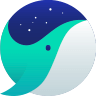
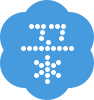

In [3]:
print(soup)

## 파서

- 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공해주는 프로그램
    - lxml
        - C언어로 구현되어 속도가 가장 빠름
    - html6lib
        - 웹브라우저 형태로 HTML을 분석
        - 속도가 가장 느림
        - 가장 안정적
    - html.parser
        - lxml과 html5lib의 중간속도


In [4]:
import time

In [8]:
S = time.time()
BeautifulSoup(page, 'lxml')
lxml_time = time.time() - S
######################################
S = time.time()
BeautifulSoup(page, 'html.parser')
html_time = time.time() - S
###################################
S = time.time()
BeautifulSoup(page, 'html5lib')
html5lib_time = time.time() - S

print(f'lxml 시간측정 : {lxml_time} 초')
print(f'html.parser 시간측정 : {html_time} 초')
print(f'html5lib 시간측정 : {html5lib_time} 초')

lxml 시간측정 : 0.0009987354278564453 초
html.parser 시간측정 : 0.0 초
html5lib 시간측정 : 0.0009965896606445312 초


# 테그 접근

In [9]:
url = 'http://www.naver.com'

page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')

tag_title = soup.title
print(tag_title)

<title>NAVER</title>


# 원하는 요소에 접근하기

find_all()
 - 원하는 태그들을 리스트 형태로 가져오기

In [10]:
html = """<html> <head><title>test site</title></head> <body> <p>test1</p><p>test2</p><p>test3</p></p> </body></html>"""

soup = BeautifulSoup(html, 'lxml')

In [11]:
soup.find_all('title')

[<title>test site</title>]

In [12]:
tag_body = soup.find_all('body')
print(tag_body)
tag_p = tag_body[0].find_all('p')
print(tag_p)

[<body> <p>test1</p><p>test2</p><p>test3</p> </body>]
[<p>test1</p>, <p>test2</p>, <p>test3</p>]


#### find()

- 하나의 요소만 가져옴
- 찾고자 하는 요소가 하나만 있을 때 사용
    - ex_id값으로 접근

In [17]:
print(soup.find('p', class_ = 'd'))

None


In [19]:
soup.find('body').find('p', class_ = 'd')

#### select()

- find_all() 과 마찬가지로 매칭되는 ㅣ모든 결과를 리스트로 반환
- 클래스는 마침표(.), 아이디는 샵(#)으로 자식태그는 띄어 쓰기로 표현

- select_one() 으로 하나의 결과만 반환 하는 것도 가능

In [20]:
print(soup.select('p'))

[<p>test1</p>, <p>test2</p>, <p>test3</p>]


In [21]:
print(soup.select('.d'))

[]
